# 2. Perceptron

Data de entrega: 14/09/2025 (última alteração 15 set.)

O enunciado da atividade está disponível neste [link](https://insper.github.io/ann-dl/versions/2025.2/exercises/perceptron/main).

### Utilitário

In [1]:
from utils import data
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
N = 1000

In [3]:
activation = lambda z: 1 if z >= 0 else 0

In [4]:
def shuffle_sample(sample_array, labels_array):
    lista = list(zip(sample_array, labels_array))
    random.shuffle(lista)

    features, labels = zip(*lista)
    return np.array(features), np.array(labels)

In [5]:
def confusion_matrix(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    VP = np.sum((y_true == 1) & (y_pred == 1))  # verdadeiros positivos
    VN = np.sum((y_true == 0) & (y_pred == 0))  # verdadeiros negativos
    FP = np.sum((y_true == 0) & (y_pred == 1))  # falsos positivos
    FN = np.sum((y_true == 1) & (y_pred == 0))  # falsos negativos

    return np.array([[VN, FP],
                     [FN, VP]])

def accuracy(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    return np.mean(y_true == y_pred)

In [14]:
def forward(x, y, activation, n_epochs, eta=.01):
    W = np.array([[0, 0]])
    b = 0

    acc_array = []
    total_epochs = 0

    for i in range(n_epochs):
        print(f"[epoch {i+1}] Starting...")

        total_epochs = i+1
        y_pred_vec = []
        updated = 0

        for j in range(x.shape[0]):
            z = np.dot(W, x[j].T) + b

            y_pred = activation(z)

            y_pred_vec.append(y_pred)

            error = y[j] - y_pred
            
            if error != 0:
                updated += 1
                W = W + eta * error * x[j]
                b = b + eta * error
        
        acc = accuracy(y, y_pred_vec)
        acc_array.append(acc)

        print(f"- Accuracy: {acc}")

        if not updated:
            print(f"- No updates detected...")

            break

    print(f"Training finished after {total_epochs} epochs.")
    return W, b, y_pred_vec

## Exercício 1

In [24]:
class_0_1 = data.MultiDimensionData(mu=[1.5, 1.5],
                                  cov=[[0.5, 0], [0, 0.5]],
                                  n=1000)

class_1_1 = data.MultiDimensionData(mu=[5, 5],
                                  cov=[[0.5, 0], [0, 0.5]],
                                  n=1000)

In [25]:
features_1 = np.concatenate((class_0_1.sample_initialize(), class_1_1.sample_initialize()))
labels_1 = np.concatenate((np.zeros(1000, dtype=int), np.ones(1000, dtype=int)))

In [26]:
shuffled_features_1, shuffled_labels_1 = shuffle_sample(sample_array=features_1, labels_array=labels_1)

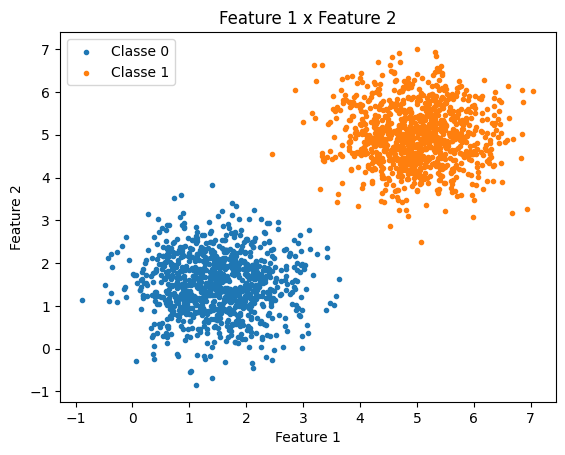

In [27]:
plt.scatter(features_1[labels_1 == 0, 0], features_1[labels_1 == 0, 1], label="Classe 0", marker=".")
plt.scatter(features_1[labels_1==1, 0], features_1[labels_1==1, 1], label="Classe 1", marker=".")

plt.title("Feature 1 x Feature 2")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.legend()

plt.show()

In [28]:
W_1, b_1, y_pred_vec_1 = forward(shuffled_features_1, shuffled_labels_1, activation, 100)

[epoch 1] Starting...
- Accuracy: 0.9945
[epoch 2] Starting...
- Accuracy: 1.0
- No updates detected...
Training finished after 2 epochs.


In [29]:
from itertools import chain

flatten = list(chain.from_iterable(features_1))

x1 = np.linspace(min(flatten), max(flatten), 2000)

W_1 = list(chain.from_iterable(W_1))

x2 = -(W_1[0] * x1 + b_1) / W_1[1]

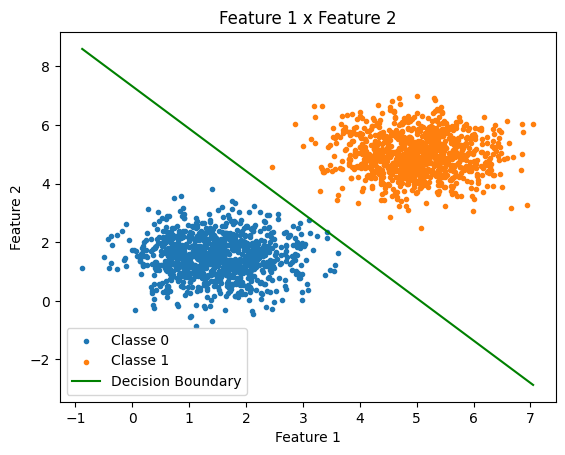

In [30]:
plt.scatter(features_1[labels_1 == 0, 0], features_1[labels_1 == 0, 1], label="Classe 0", marker=".")
plt.scatter(features_1[labels_1 == 1, 0], features_1[labels_1 == 1, 1], label="Classe 1", marker=".")

plt.plot(x1, x2, color="green", label="Decision Boundary")

plt.title("Feature 1 x Feature 2")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.legend()

plt.show()

## Exercício 2

In [7]:
class_0_2 = data.MultiDimensionData(mu=[3, 3],
                                    cov=[[1.5, 0], [0, 1.5]],
                                    n=N)

class_1_2 = data.MultiDimensionData(mu=[4, 4],
                                    cov=[[1.5, 0], [0, 1.5]],
                                    n=N)

In [8]:
features_2 = np.concatenate((class_0_2.sample_initialize(), class_1_2.sample_initialize()))
labels_2 = np.concatenate((np.zeros(N, dtype=int), np.ones(N, dtype=int)))

In [9]:
shuffled_features_2, shuffled_labels_2 = shuffle_sample(sample_array=features_2, labels_array=labels_2)

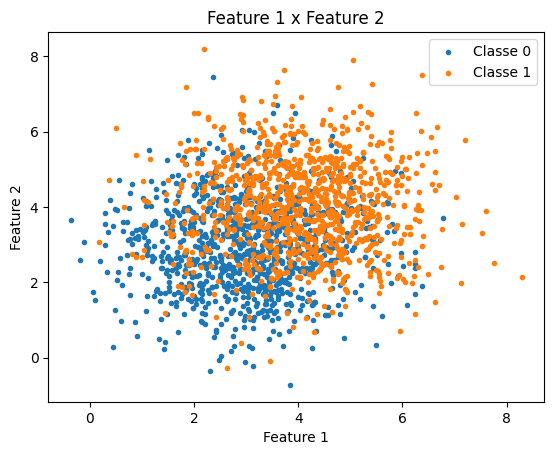

In [10]:
plt.scatter(features_2[labels_2 == 0, 0], features_2[labels_2 == 0, 1], label="Classe 0", marker=".")
plt.scatter(features_2[labels_2 == 1, 0], features_2[labels_2 == 1, 1], label="Classe 1", marker=".")

plt.title("Feature 1 x Feature 2")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.legend()

plt.show()

In [11]:
W_2, b_2, y_pred_vec_2 = forward(shuffled_features_2, shuffled_labels_2, activation, 100)

[epoch 1] Starting...
- Accuracy: 0.595
[epoch 2] Starting...
- Accuracy: 0.637
[epoch 3] Starting...
- Accuracy: 0.6415
[epoch 4] Starting...
- Accuracy: 0.6415
[epoch 5] Starting...
- Accuracy: 0.646
[epoch 6] Starting...
- Accuracy: 0.6355
[epoch 7] Starting...
- Accuracy: 0.644
[epoch 8] Starting...
- Accuracy: 0.647
[epoch 9] Starting...
- Accuracy: 0.6485
[epoch 10] Starting...
- Accuracy: 0.6495
[epoch 11] Starting...
- Accuracy: 0.6315
[epoch 12] Starting...
- Accuracy: 0.645
[epoch 13] Starting...
- Accuracy: 0.6485
[epoch 14] Starting...
- Accuracy: 0.6495
[epoch 15] Starting...
- Accuracy: 0.644
[epoch 16] Starting...
- Accuracy: 0.6375
[epoch 17] Starting...
- Accuracy: 0.6415
[epoch 18] Starting...
- Accuracy: 0.6415
[epoch 19] Starting...
- Accuracy: 0.643
[epoch 20] Starting...
- Accuracy: 0.6445
[epoch 21] Starting...
- Accuracy: 0.6355
[epoch 22] Starting...
- Accuracy: 0.654
[epoch 23] Starting...
- Accuracy: 0.647
[epoch 24] Starting...
- Accuracy: 0.6475
[epoch 25] 

In [12]:
from itertools import chain

flatten = list(chain.from_iterable(features_2))

x1 = np.linspace(min(flatten), max(flatten), 2000)

W_2 = list(chain.from_iterable(W_2))

x2 = -(W_2[0] * x1 + b_2) / W_2[1]

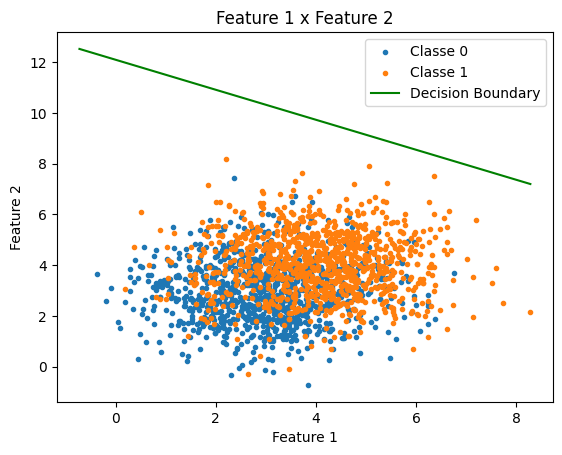

In [13]:
plt.scatter(features_2[labels_2 == 0, 0], features_2[labels_2 == 0, 1], label="Classe 0", marker=".")
plt.scatter(features_2[labels_2==1, 0], features_2[labels_2==1, 1], label="Classe 1", marker=".")
plt.plot(x1, x2, color="green", label="Decision Boundary")

plt.title("Feature 1 x Feature 2")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.legend()

plt.show()